In [1]:
# To be able to make edits to repo without having to restart notebook
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, wilcoxon, ttest_rel, ttest_ind
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ColorConverter


PROJECT_PATH = os.getcwd()
proto_path = os.path.abspath(os.path.join(PROJECT_PATH, os.pardir))
neuro_path = os.path.abspath(os.path.join(proto_path, os.pardir))
sys.path.append(neuro_path)
print(neuro_path)

from library.study_space import Session, Study
from x_io.rw.axona.batch_read import make_study
from _prototypes.cell_remapping.src.masks import make_object_ratemap

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit


In [3]:
STUDY_SETTINGS = {

        'ppm': 485,  # EDIT HERE

        'smoothing_factor': 3, # EDIT HERE

        'useMatchedCut': True,  # EDIT HERE
    }


# Switch devices to True/False based on what is used in the acquisition (to be extended for more devices in future)
device_settings = {'axona_led_tracker': True, 'implant': True} 
# Make sure implant metadata is correct, change if not, AT THE MINIMUM leave implant_type: tetrode
implant_settings = {'implant_type': 'tetrode', 'implant_geometry': 'square', 'wire_length': 25, 'wire_length_units': 'um', 'implant_units': 'uV'}
# WE ASSUME DEVICE AND IMPLANT SETTINGS ARE CONSISTENCE ACROSS SESSIONS
# Set channel count + add device/implant settings
SESSION_SETTINGS = {
    'channel_count': 4, # EDIT HERE, default is 4, you can change to other number but code will check how many tetrode files are present and set that to channel copunt regardless
    'devices': device_settings, # EDIT HERE
    'implant': implant_settings, # EDIT HERE
}
STUDY_SETTINGS['session'] = SESSION_SETTINGS
settings_dict = STUDY_SETTINGS

settings_dict['speed_lowerbound'] = 0 
settings_dict['speed_upperbound'] = 99
settings_dict['ratemap_dims'] = (32,32)
settings_dict['disk_arena'] = True

In [7]:
angle_groups = [0,90,180,270,'NO']
groups = ['B6', 'NON', 'ANT']
session_groups = ['session_1', 'session_2', 'session_3', 'session_4', 'session_5', 'session_6', 'session_7']
ctype_groups = ['object','trace','unassigned']

folder_path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\LEC_average_ratemaps\all_ctypes_7_ses_repeat"

avg_map_dict = {}
missing_map_dict = {}

for folder in os.listdir(folder_path):
    # if 'missing' in folder.lower():
    #     dict_to_use = missing_map_dict
    # else:
    #     dict_to_use = avg_map_dict
    dict_to_use = avg_map_dict

    if 'avgs' in folder.lower():

        for group in groups:
            if True:
                dict_to_use[group] = np.load(os.path.join(folder_path, folder, 'average_ratemap_' + group + '.npy'))
                for angle in angle_groups:
                    dict_to_use[group + '_' + str(angle)] = np.load(os.path.join(folder_path, folder, 'average_ratemap_' + group + '_' + str(angle) + '.npy'))
                for session in session_groups:
                    if group == 'B6' and session == 'session_7':
                        pass
                    else:
                        dict_to_use[group + '_' + session] = np.load(os.path.join(folder_path, folder, 'average_ratemap_' + group + '_' + session + '.npy'))
                for ctype in ctype_groups:
                    dict_to_use[group + '_' + ctype] = np.load(os.path.join(folder_path, folder, 'average_ratemap_' + group + '_' + ctype + '.npy'))
                    for session in ['session_1', 'session_2', 'session_3']:
                        dict_to_use[group + '_' + ctype + '_' + session] = np.load(os.path.join(folder_path, folder, 'average_ratemap_' + group + '_' + ctype + '_' + session + '.npy'))
            else:
                pass
    


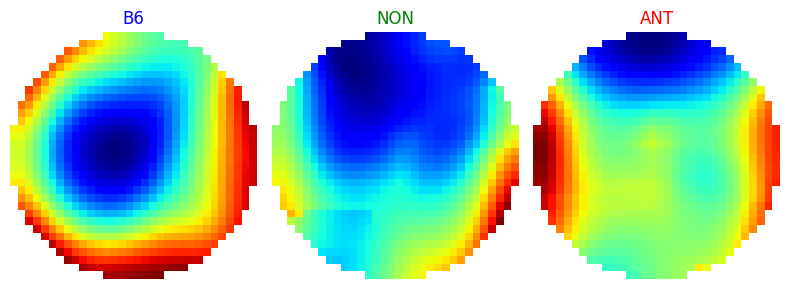

In [17]:
fig = plt.figure(figsize=(8,6))
clrs = ['b', 'g', 'r']
for i, group in enumerate(groups):
        ax = plt.subplot(1,len(groups), i+1)
        ax.imshow(avg_map_dict[group], cmap='jet')
        ax.set_title(group, color = clrs[i])
        ax.axis('off')
fig.tight_layout()
plt.show()

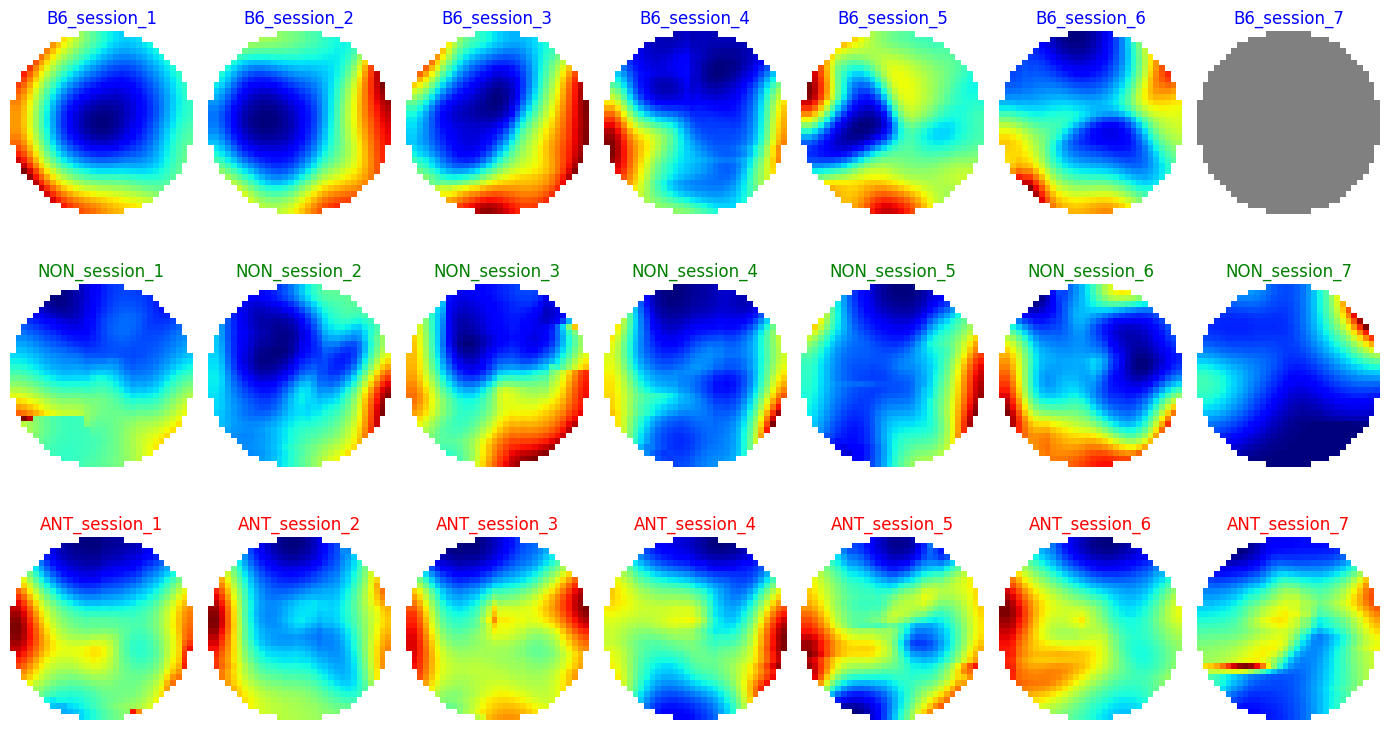

In [10]:
fig = plt.figure(figsize=(14,8))
bgr = ['blue', 'green', 'red']
for i, group in enumerate(groups):
    for j, ses in enumerate(session_groups):
        ax = plt.subplot(len(groups), len(session_groups), i*len(session_groups) + j + 1)

        if group == 'B6' and ses == 'session_7':
            shp = np.copy(avg_map_dict[group + '_' + 'session_1'])
            shp[shp == shp] = 0.5
            ax.imshow(shp, cmap='gray', vmin=0, vmax=1)
        else:  
            ax.imshow(avg_map_dict[group + '_' + str(ses)], cmap='jet')
        ax.set_title(group + '_' + str(ses), color=bgr[i])
        ax.axis('off')
fig.tight_layout()
plt.show()

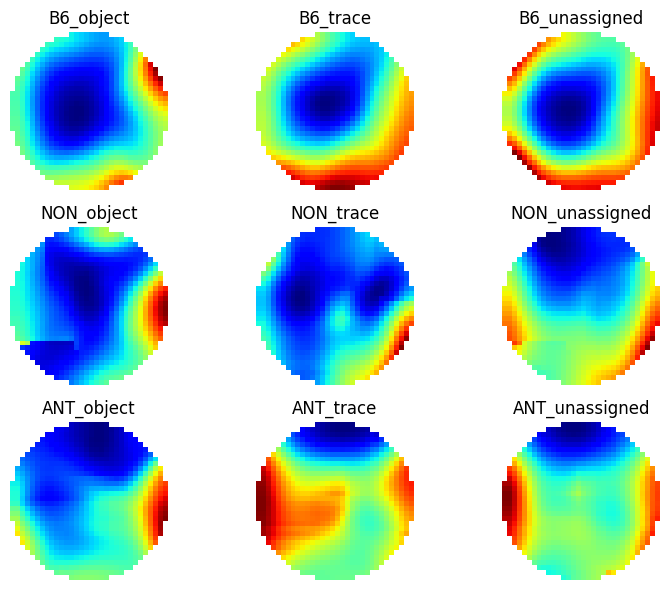

In [11]:
fig = plt.figure(figsize=(8,6))
for i, group in enumerate(groups):
    for j, ctype in enumerate(ctype_groups):
        ax = plt.subplot(len(groups), len(ctype_groups), i*len(ctype_groups) + j + 1)

        ax.imshow(avg_map_dict[group + '_' + str(ctype)], cmap='jet')
        ax.set_title(group + '_' + str(ctype))
        ax.axis('off')
fig.tight_layout()
plt.show()

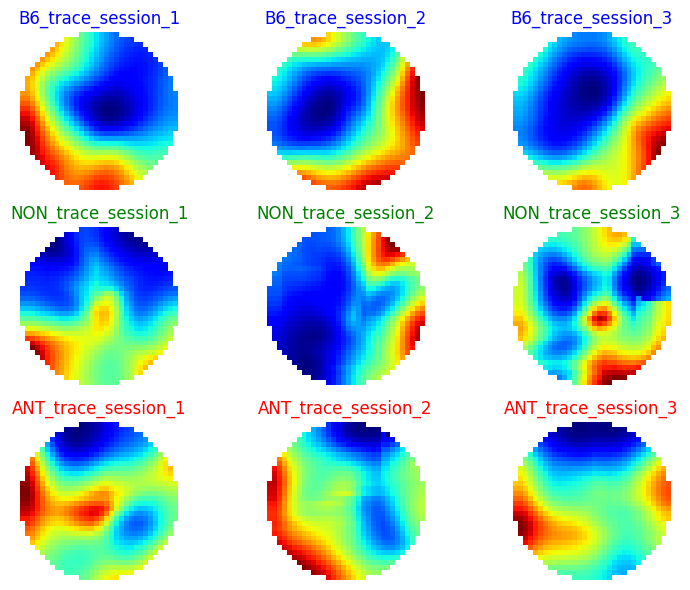

In [19]:
fig = plt.figure(figsize=(8,6))
ses_ids = ['session_1', 'session_2', 'session_3']
ctype = 'trace'
for i, group in enumerate(groups):
    for j, ses_id in enumerate(ses_ids):
        ax = plt.subplot(len(groups), len(ses_ids), i*len(ses_ids) + j + 1)

        ax.imshow(avg_map_dict[group + '_' + str(ctype) + '_' + str(ses_id)], cmap='jet')
        ax.set_title(group + '_' + str(ctype) + '_' + str(ses_id), color=bgr[i])
        ax.axis('off')
fig.tight_layout()
plt.show()

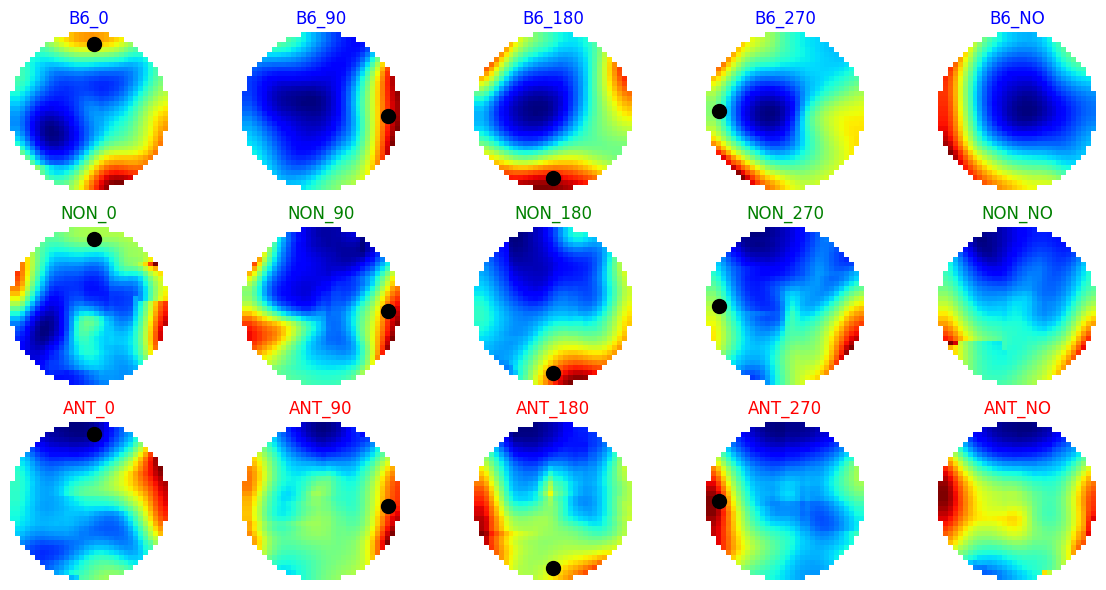

In [13]:
fig = plt.figure(figsize=(12,6))
for i, group in enumerate(groups):
    for j, angle in enumerate(angle_groups):
        ax = plt.subplot(len(groups), len(angle_groups), i*len(angle_groups) + j + 1)

        ax.imshow(avg_map_dict[group + '_' + str(angle)], cmap='jet')
        ax.set_title(group + '_' + str(angle), color=bgr[i])
        ax.axis('off')

        if angle != 'NO':
            angle = int(angle)
            _, obj_loc = make_object_ratemap(angle, new_size=32)
            
            if angle == 0:
                obj_loc['x'] += .5
                obj_loc['y'] += 2
            elif angle == 90:
                obj_loc['y'] += .5
                obj_loc['x'] -= 2
            elif angle == 180:
                obj_loc['x'] -= .5
                obj_loc['y'] -= 2
            elif angle == 270:
                obj_loc['y'] -= .5
                obj_loc['x'] += 2
            ax.plot(obj_loc['x'], obj_loc['y'], 'k', marker='o', markersize=10)

fig.tight_layout()
plt.show()

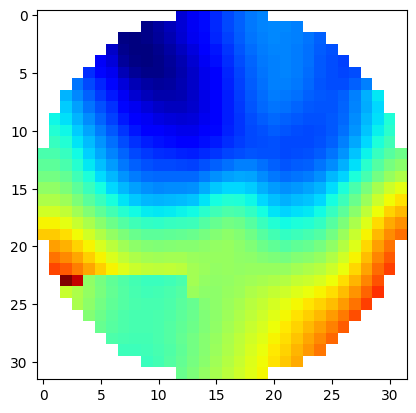

In [14]:
import numpy as np
import matplotlib.pyplot as plt

y_segments = 32
x_segments = 32
y_center, x_center = (y_segments-1)/2, (x_segments-1)/2
mask_r = min(x_segments, y_segments)/2
mask_y,mask_x = np.ogrid[-y_center:y_segments-y_center, -x_center:x_segments-x_center]
mask = mask_x**2 + mask_y**2 > mask_r**2
# mask_indices = [[[] for i in range(x_segments)] for j in range(y_segments)]
# for i in range(y_segments):
#     for j in range(x_segments):
#         if mask[i][j] == mask[i][j]:
#             mask_indices[i][j] = [i,j]
#         else:
#             mask_indices[i][j] = np.nan

# mask_indices = np.array(mask_indices)
# mask_indices = mask_indices[mask_indices == mask_indices]


pt = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\LEC_average_ratemaps\Average Ratemaps"
end = r"\average_ratemap_NON_NO.npy"
data_to_reshape = np.load(pt + end)

# recon = np.full((32,32), np.nan)
# indices = np.argwhere(~mask)
# recon[indices[:, 0], indices[:, 1]] = data_to_reshape 

# fig = plt.figure(figsize=(4,4))
plt.imshow(data_to_reshape, cmap='jet')
plt.show()

In [15]:
indices.shape

NameError: name 'indices' is not defined

In [ ]:
np.array(mask_indices).shape

In [ ]:
y_segments = 32
x_segments = 32
y_center, x_center = (y_segments-1)/2, (x_segments-1)/2
mask_r = min(x_segments, y_segments)/2
mask_y,mask_x = np.ogrid[-y_center:y_segments-y_center, -x_center:x_segments-x_center]
mask = mask_x**2 + mask_y**2 > mask_r**2
mask_indices = np.where(mask == False)

In [ ]:
mask_indices[0].shape